In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver

In [3]:
df = pd.read_csv('data.csv')
df.head(4)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M


In [4]:
df.shape

(18207, 89)

In [5]:
df = df.set_index('Unnamed: 0')

In [6]:
df.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
df.dtypes

ID                  int64
Name               object
Age                 int64
Photo              object
Nationality        object
                   ...   
GKHandling        float64
GKKicking         float64
GKPositioning     float64
GKReflexes        float64
Release Clause     object
Length: 88, dtype: object

In [8]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [9]:
df.rename(columns={'Release Clause': 'release_clause',
                  'Club Logo':'Club_logo',
                   'Preferred Foot':'Preferred_foot',
                  'International Reputation':'International_reputation',
                  'Weak Foot':'Weak_foot',
                  'Skill Moves':'Skill_moves',
                  'Work Rate':'Work_rate',
                  'Body Type': 'Body_type',
                  'Real Face':'Real_face',
                  'Jersey Number':'Jersey_number',
                  'Loaned From':'Loaned_from',
                  'Contract Valid Until': 'Contract_valid_until'},inplace=True)

In [10]:
df_body_type = df['Body_type']
df.Joined.value_counts()

Jul 1, 2018     1538
Jul 1, 2017     1133
Jan 1, 2018      635
Jul 1, 2016      614
Jul 1, 2015      368
                ... 
Aug 1, 2005        1
Aug 27, 2017       1
Feb 18, 2017       1
Jul 26, 2014       1
Aug 11, 2010       1
Name: Joined, Length: 1736, dtype: int64

In [11]:
new = df['Joined'].str.split(',', n = 1 , expand=True)
new.head()

,0,1
Unnamed: 0,,
0,Jul 1,2004
1,Jul 10,2018
2,Aug 3,2017
3,Jul 1,2011
4,Aug 30,2015


In [12]:
new_1 = new[0].str.split(" ", n = 2 , expand=True)
new_1.head()

,0,1
Unnamed: 0,,
0,Jul,1
1,Jul,10
2,Aug,3
3,Jul,1
4,Aug,30


In [13]:
df['month_joined'] = new_1[0]
df['day_joined']= new_1[1]
df['year_joined'] = new[1]
df.drop(columns='Joined',inplace=True)
df.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,release_clause,month_joined,day_joined,year_joined
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,Jul,1,2004
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,Jul,10,2018
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,Aug,3,2017


In [14]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_logo', 'Value', 'Wage', 'Special',
       'Preferred_foot', 'International_reputation', 'Weak_foot',
       'Skill_moves', 'Work_rate', 'Body_type', 'Real_face', 'Position',
       'Jersey_number', 'Loaned_from', 'Contract_valid_until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKH

In [15]:
df.Body_type.value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Shaqiri                    1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Neymar                     1
C. Ronaldo                 1
Akinfenwa                  1
Messi                      1
Name: Body_type, dtype: int64

In [16]:
df['Body_type'].replace('PLAYER_BODY_TYPE_25','Normal',inplace=True)

In [17]:
df.Contract_valid_until.value_counts()

2019            4819
2021            4360
2020            4027
2022            1477
2023            1053
Jun 30, 2019     931
2018             886
Dec 31, 2018     144
May 31, 2019      60
Jan 1, 2019       51
2024              23
Jun 30, 2020      14
Jan 31, 2019      13
2025               7
Jan 2, 2019        6
Jan 5, 2019        6
Jan 12, 2019       5
Oct 14, 2019       5
Jan 6, 2019        4
Dec 31, 2019       3
Jan 25, 2019       3
Jan 7, 2019        3
Nov 30, 2018       2
May 31, 2020       2
2026               2
Dec 1, 2019        2
Jan 3, 2019        1
Jan 30, 2019       1
Jan 20, 2019       1
Jan 15, 2019       1
Feb 27, 2020       1
Jan 11, 2019       1
Jan 4, 2019        1
Jan 18, 2019       1
May 4, 2019        1
Jun 1, 2019        1
Name: Contract_valid_until, dtype: int64

In [18]:
new_contract = df['Contract_valid_until'].str.split(" " , n = 2 , expand = True)
new_contract[0].value_counts()

2019    4819
2021    4360
2020    4027
2022    1477
2023    1053
Jun      946
2018     886
Dec      149
Jan       98
May       63
2024      23
2025       7
Oct        5
Nov        2
2026       2
Feb        1
Name: 0, dtype: int64

In [19]:
new_contract[0].replace('Jan',0,inplace=True)
new_contract[0].replace('Dec',0,inplace=True)
new_contract[0].replace('May',0,inplace=True)
new_contract[0].replace('Oct',0,inplace=True)
new_contract[0].replace('Nov',0,inplace=True)
new_contract[0].replace('Feb',0,inplace=True)
new_contract[0].replace('Jun',0,inplace=True)
new_contract[0].value_counts()

2019    4819
2021    4360
2020    4027
2022    1477
0       1264
2023    1053
2018     886
2024      23
2025       7
2026       2
Name: 0, dtype: int64

In [20]:
new_contract.drop(columns = 1,inplace=True)

In [21]:
new_contract.rename( columns={0 :'year',2 : 'year_1'}, inplace=True )
new_contract.head(5)

,year,year_1
Unnamed: 0,,
0,2021,None
1,2022,None
2,2022,None
3,2020,None
4,2023,None


In [22]:
new_contract.fillna(value=pd.np.nan, inplace=True)

In [23]:
def fx(x):
    if pd.isnull(x['year_1']):
        return x['year']
    else:
        return x['year_1']
new_contract['year_1']=new_contract.apply(lambda x : fx(x),axis=1)

In [24]:
df['Contract_valid_until'] = new_contract['year_1']
df.Contract_valid_until.value_counts()

2019    5920
2021    4360
2020    4044
2022    1477
2023    1053
2018    1032
2024      23
2025       7
2026       2
Name: Contract_valid_until, dtype: int64

In [25]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_logo', 'Value', 'Wage', 'Special',
       'Preferred_foot', 'International_reputation', 'Weak_foot',
       'Skill_moves', 'Work_rate', 'Body_type', 'Real_face', 'Position',
       'Jersey_number', 'Loaned_from', 'Contract_valid_until', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKH

In [26]:
def clear(x):
    try:
        if 'M' in x:
            return x.replace('M','00000')
        elif 'K' in x:
            return x.replace('K','000')
    except: 
            return x

df['Value'] = df['Value'].apply(lambda x : clear(x))
df['Wage'] = df['Wage'].apply(lambda x : clear(x))
df['release_clause'] = df['release_clause'].apply(lambda x : clear(x))
df[['Value','Wage','release_clause']].head(10)

,Value,Wage,release_clause
Unnamed: 0,,,
0,€110.500000,€565000,€226.500000
1,€7700000,€405000,€127.100000
2,€118.500000,€290000,€228.100000
3,€7200000,€260000,€138.600000
4,€10200000,€355000,€196.400000
5,€9300000,€340000,€172.100000
6,€6700000,€420000,€137.400000
7,€8000000,€455000,€16400000
8,€5100000,€380000,€104.600000


In [27]:
def clean(x):
    try:
        if '€' in x:
            return x.replace('€','')
        elif '$'in x:
            return x.replace('$','')
    except: 
            return x

df['Value'] = df['Value'].apply(lambda x : clean(x))
df['Wage'] = df['Wage'].apply(lambda x : clean(x))
df['release_clause'] = df['release_clause'].apply(lambda x : clean(x))
df[['Value','Wage','release_clause']].head(10)

,Value,Wage,release_clause
Unnamed: 0,,,
0,110.500000,565000,226.500000
1,7700000,405000,127.100000
2,118.500000,290000,228.100000
3,7200000,260000,138.600000
4,10200000,355000,196.400000
5,9300000,340000,172.100000
6,6700000,420000,137.400000
7,8000000,455000,16400000
8,5100000,380000,104.600000


In [28]:
def limpiar(x):
    try:
        if '.' in x:
            return x.replace('.','')
        elif ',' in x:
            return x.replace(',','')
        else:
            return x
    except:
            return x 

df['Value'] = df['Value'].apply(lambda x : limpiar(x))
df['Wage'] = df['Wage'].apply(lambda x : limpiar(x))
df['release_clause'] = df['release_clause'].apply(lambda x : limpiar(x))
df[['Value','Wage','release_clause']].head(10)

,Value,Wage,release_clause
Unnamed: 0,,,
0,110500000,565000,226500000
1,7700000,405000,127100000
2,118500000,290000,228100000
3,7200000,260000,138600000
4,10200000,355000,196400000
5,9300000,340000,172100000
6,6700000,420000,137400000
7,8000000,455000,16400000
8,5100000,380000,104600000


In [29]:
df['Value'].sort_values()

Unnamed: 0
17842    10000
17704    10000
15426    10000
17657    10000
16204    10000
         ...  
17539     None
17672     None
17726     None
17752     None
18183     None
Name: Value, Length: 18207, dtype: object

In [30]:
columns =pd.DataFrame(df.columns)
dtypes = df.dtypes.values
df_data_types = pd.DataFrame(dtypes,columns=['Dtypes'])
df_data_types['Column_name'] = columns
df_data_types

,Dtypes,Column_name
0,int64,ID
1,object,Name
2,int64,Age
3,object,Photo
4,object,Nationality
...,...,...
85,float64,GKReflexes
86,object,release_clause
87,object,month_joined
88,object,day_joined


In [31]:
df_data_types.groupby('Dtypes').count()

,Column_name
Dtypes,
int64,5
float64,38
object,47


In [32]:
df_data_types[(df_data_types.Dtypes) == 'object']

,Dtypes,Column_name
1,object,Name
3,object,Photo
4,object,Nationality
5,object,Flag
8,object,Club
9,object,Club_logo
10,object,Value
11,object,Wage
13,object,Preferred_foot
17,object,Work_rate


In [33]:
df.isnull().sum().sort_values(ascending=False).head(26)

Loaned_from    16943
CDM             2085
LM              2085
CB              2085
LCB             2085
LB              2085
RWB             2085
RDM             2085
LDM             2085
LWB             2085
RM              2085
RCM             2085
CM              2085
LCM             2085
RAM             2085
RB              2085
CAM             2085
LAM             2085
RW              2085
RF              2085
CF              2085
LF              2085
LW              2085
RS              2085
ST              2085
LS              2085
dtype: int64

In [34]:
df.drop(columns=['Loaned_from'],inplace=True)

In [35]:
lista = df.columns
columnas_2085 = []
for x in range (0, len(lista)):
    if df[lista[x]].isna().sum() == 2085:
        columnas_2085.append(lista[x])
columnas_2085

['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB']

In [36]:
df_null_ls = df[df.LS.isnull()]
df_null_ls.tail()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,release_clause,month_joined,day_joined,year_joined
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
18178,243158,L. Wahlstedt,18,https://cdn.sofifa.org/players/4/19/243158.png,Sweden,https://cdn.sofifa.org/flags/46.png,48,65,Dalkurd FF,https://cdn.sofifa.org/teams/2/light/113876.png,...,10.0,47.0,46.0,50.0,45.0,51.0,94000,Apr,4,2018
18180,221669,M. Hurst,22,https://cdn.sofifa.org/players/4/19/221669.png,Scotland,https://cdn.sofifa.org/flags/42.png,48,58,St. Johnstone FC,https://cdn.sofifa.org/teams/2/light/100804.png,...,16.0,45.0,49.0,50.0,50.0,45.0,78000,Jul,1,2013
18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,13.0,45.0,48.0,44.0,49.0,46.0,NaN,Aug,17,2018
18194,245862,J. Milli,18,https://cdn.sofifa.org/players/4/19/245862.png,Italy,https://cdn.sofifa.org/flags/27.png,47,65,Lecce,https://cdn.sofifa.org/teams/2/light/347.png,...,11.0,52.0,52.0,52.0,40.0,44.0,109000,Jul,1,2018
18198,242844,J. Livesey,18,https://cdn.sofifa.org/players/4/19/242844.png,England,https://cdn.sofifa.org/flags/14.png,47,70,Burton Albion,https://cdn.sofifa.org/teams/2/light/15015.png,...,13.0,46.0,52.0,58.0,42.0,48.0,165000,Nov,10,2018


In [37]:
df_null_ls.Position.sort_values()

Unnamed: 0
3         GK
14235     GK
14230     GK
14223     GK
14206     GK
        ... 
16793    NaN
17129    NaN
17339    NaN
17436    NaN
17539    NaN
Name: Position, Length: 2085, dtype: object

In [38]:
df_null_position = df[df.Position.isnull()]
df_null_position.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,release_clause,month_joined,day_joined,year_joined
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,NaN,https://cdn.sofifa.org/flags/53.png,...,70.0,16.0,8.0,11.0,12.0,13.0,NaN,NaN,NaN,NaN
6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,NaN,https://cdn.sofifa.org/flags/53.png,...,33.0,16.0,13.0,15.0,16.0,8.0,NaN,NaN,NaN,NaN
7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,NaN,https://cdn.sofifa.org/flags/53.png,...,64.0,11.0,7.0,8.0,12.0,12.0,NaN,NaN,NaN,NaN
9905,226044,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,https://cdn.sofifa.org/flags/53.png,66,69,NaN,https://cdn.sofifa.org/flags/53.png,...,23.0,13.0,11.0,11.0,7.0,9.0,NaN,NaN,NaN,NaN
10628,216751,D. Bejarano,26,https://cdn.sofifa.org/players/4/19/216751.png,Bolivia,https://cdn.sofifa.org/flags/53.png,65,66,NaN,https://cdn.sofifa.org/flags/53.png,...,68.0,14.0,12.0,11.0,14.0,12.0,NaN,NaN,NaN,NaN


In [39]:
df.dropna(subset=['Position'],inplace=True)

In [40]:
for col in columnas_2085:
    df[col].fillna(0,inplace=True)
df[columnas_2085]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,42+2,42+2,42+2,44+2,44+2,44+2,44+2,44+2,45+2,45+2,...,44+2,45+2,45+2,45+2,44+2,45+2,45+2,45+2,45+2,45+2
18203,45+2,45+2,45+2,39+2,42+2,42+2,42+2,39+2,40+2,40+2,...,30+2,31+2,31+2,31+2,30+2,29+2,32+2,32+2,32+2,29+2
18204,45+2,45+2,45+2,45+2,46+2,46+2,46+2,45+2,44+2,44+2,...,34+2,30+2,30+2,30+2,34+2,33+2,28+2,28+2,28+2,33+2


In [41]:
df.isnull().sum().sort_values(ascending=False).head(20)

release_clause          1504
year_joined             1493
day_joined              1493
month_joined            1493
Value                    240
Contract_valid_until     229
Club                     229
Wage                     229
RF                         0
Weight                     0
LS                         0
ST                         0
RS                         0
LW                         0
LF                         0
CF                         0
RM                         0
RW                         0
RCM                        0
Height                     0
dtype: int64

In [42]:
df.drop(columns=['day_joined','month_joined'],inplace=True)

In [43]:
df.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_logo', 'Value', 'Wage', 'Special',
       'Preferred_foot', 'International_reputation', 'Weak_foot',
       'Skill_moves', 'Work_rate', 'Body_type', 'Real_face', 'Position',
       'Jersey_number', 'Contract_valid_until', 'Height', 'Weight', 'LS', 'ST',
       'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM',
       'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKi

In [44]:
df.Nationality.value_counts()

England                1657
Germany                1195
Spain                  1071
Argentina               936
France                  911
                       ... 
Belize                    1
Grenada                   1
São Tomé & Príncipe       1
Oman                      1
Puerto Rico               1
Name: Nationality, Length: 164, dtype: int64

In [45]:
df_null_release_clause = df[df.release_clause.isnull()]
df_null_release_clause.head(10)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,release_clause,year_joined
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
28,198710,J. Rodríguez,26,https://cdn.sofifa.org/players/4/19/198710.png,Colombia,https://cdn.sofifa.org/flags/56.png,88,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,52.0,41.0,44.0,15.0,15.0,15.0,5.0,14.0,NaN,NaN
38,167664,G. Higuaín,30,https://cdn.sofifa.org/players/4/19/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,88,88,Milan,https://cdn.sofifa.org/teams/2/light/47.png,...,35.0,22.0,18.0,5.0,12.0,7.0,5.0,10.0,NaN,NaN
91,187961,Paulinho,29,https://cdn.sofifa.org/players/4/19/187961.png,Brazil,https://cdn.sofifa.org/flags/54.png,85,85,Guangzhou Evergrande Taobao FC,https://cdn.sofifa.org/teams/2/light/111839.png,...,75.0,81.0,73.0,16.0,16.0,11.0,6.0,8.0,NaN,NaN
166,212523,Anderson Talisca,24,https://cdn.sofifa.org/players/4/19/212523.png,Brazil,https://cdn.sofifa.org/flags/54.png,83,90,Guangzhou Evergrande Taobao FC,https://cdn.sofifa.org/teams/2/light/111839.png,...,55.0,62.0,42.0,13.0,11.0,13.0,12.0,10.0,NaN,NaN
176,207410,M. Kovačić,24,https://cdn.sofifa.org/players/4/19/207410.png,Croatia,https://cdn.sofifa.org/flags/10.png,83,89,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,69.0,75.0,63.0,9.0,5.0,6.0,7.0,7.0,NaN,NaN
332,216409,M. Politano,24,https://cdn.sofifa.org/players/4/19/216409.png,Italy,https://cdn.sofifa.org/flags/27.png,81,84,Inter,https://cdn.sofifa.org/teams/2/light/44.png,...,63.0,29.0,29.0,11.0,12.0,6.0,8.0,11.0,NaN,NaN
354,203890,S. Vrsaljko,26,https://cdn.sofifa.org/players/4/19/203890.png,Croatia,https://cdn.sofifa.org/flags/10.png,81,84,Inter,https://cdn.sofifa.org/teams/2/light/44.png,...,77.0,81.0,77.0,15.0,11.0,10.0,10.0,12.0,NaN,NaN
357,202685,S. Zaza,27,https://cdn.sofifa.org/players/4/19/202685.png,Italy,https://cdn.sofifa.org/flags/27.png,81,82,Torino,https://cdn.sofifa.org/teams/2/light/54.png,...,54.0,42.0,50.0,7.0,13.0,9.0,7.0,9.0,NaN,NaN
427,226226,G. Lo Celso,22,https://cdn.sofifa.org/players/4/19/226226.png,Argentina,https://cdn.sofifa.org/flags/52.png,80,86,Real Betis,https://cdn.sofifa.org/teams/2/light/449.png,...,61.0,67.0,67.0,10.0,7.0,10.0,15.0,14.0,NaN,NaN


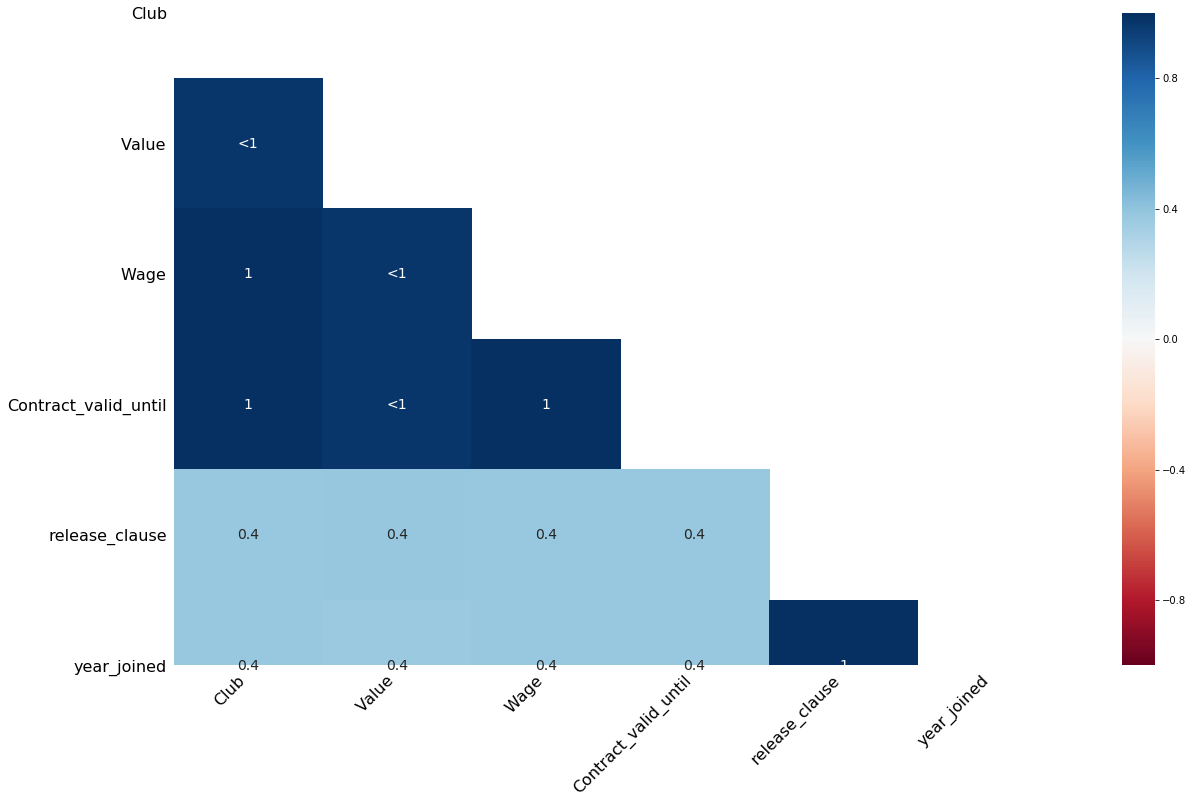

In [46]:
import missingno as msno
msno.heatmap(df)

In [ ]:
#import os
#driver = webdriver.Chrome(executable_path=os.path.abspath("chromedriver.exe"))
#driver.get(https://www.futwiz.com/en/fifa20/players)

In [53]:
df_clean = df.dropna()
df_clean

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club_logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,release_clause,year_joined
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000,2004
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000,2018
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000,2017
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000,2011
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000,2017
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000,2018
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000,2017


In [54]:
columns =pd.DataFrame(df_clean.columns)
dtypes = df_clean.dtypes.values
df_data_types = pd.DataFrame(dtypes,columns=['Dtypes'])
df_data_types['Column_name'] = columns
df_data_types

,Dtypes,Column_name
0,int64,ID
1,object,Name
2,int64,Age
3,object,Photo
4,object,Nationality
...,...,...
82,float64,GKKicking
83,float64,GKPositioning
84,float64,GKReflexes
85,object,release_clause


In [56]:
def convert_numeric(col):
    if df_clean.dtypes == 

df[columnas_2085] = df[columnas_2085].apply(lambda x:pd.to_numeric())

TypeError: ("to_numeric() missing 1 required positional argument: 'arg'", 'occurred at index LS')